# Analysis of the *Corporate Credit Rating* dataset
In this notebook we will cover the basics of the chosen data's analysis, while visualizing the results of the examinations gone trough. Nevertheless, the deeper analysis development will be found in the corresponding documentation, just the essential will be included in this file.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [40]:
df = pd.read_csv("../../data/ccr.csv")
df.head(3)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231


### 1. Structural Overview

In [24]:
print(f"Total number of training instances: {df.shape[0]}.")
print(f"Number of features to work with: {df.shape[1]}.")

Total number of training instances: 7805.
Number of features to work with: 25.


In [25]:
print(f"\nFeature type of each variable: {df.dtypes}.")


Feature type of each variable: Rating Agency                        str
Corporation                          str
Rating                               str
Rating Date                          str
CIK                                int64
Binary Rating                      int64
SIC Code                         float64
Sector                               str
Ticker                               str
Current Ratio                    float64
Long-term Debt / Capital         float64
Debt/Equity Ratio                float64
Gross Margin                     float64
Operating Margin                 float64
EBIT Margin                      float64
EBITDA Margin                    float64
Pre-Tax Profit Margin            float64
Net Profit Margin                float64
Asset Turnover                   float64
ROE - Return On Equity           float64
Return On Tangible Equity        float64
ROA - Return On Assets           float64
ROI - Return On Investment       float64
Operating Cash Flow Per S

In total being:

In [28]:
print(df.dtypes.value_counts())

float64    17
str         6
int64       2
Name: count, dtype: int64


Missingness check:

In [38]:
print(f"Number of missing data for our dataset: {df.isnull().sum()}")

Number of missing data for our dataset: Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64


No missing data, perfect!

### 2. Variable Analysis

In [39]:
print(f"Class count per feature: {df.nunique()}")

Class count per feature: Rating Agency                       7
Corporation                      1377
Rating                             23
Rating Date                      1414
CIK                               686
Binary Rating                       2
SIC Code                          240
Sector                             12
Ticker                            678
Current Ratio                    2521
Long-term Debt / Capital         2241
Debt/Equity Ratio                2484
Gross Margin                     2601
Operating Margin                 2648
EBIT Margin                      2648
EBITDA Margin                    2649
Pre-Tax Profit Margin            2649
Net Profit Margin                2642
Asset Turnover                   2424
ROE - Return On Equity           2651
Return On Tangible Equity        2648
ROA - Return On Assets           2632
ROI - Return On Investment       2641
Operating Cash Flow Per Share    2590
Free Cash Flow Per Share         2585
dtype: int64


We will just focus on the **Rating** feature, as we consider it one of the most relevant if not the most and does not have too many classes to plot.

/tmp/ipykernel_15437/1035460444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, ax=axes[0], palette='viridis')
/tmp/ipykernel_15437/1035460444.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


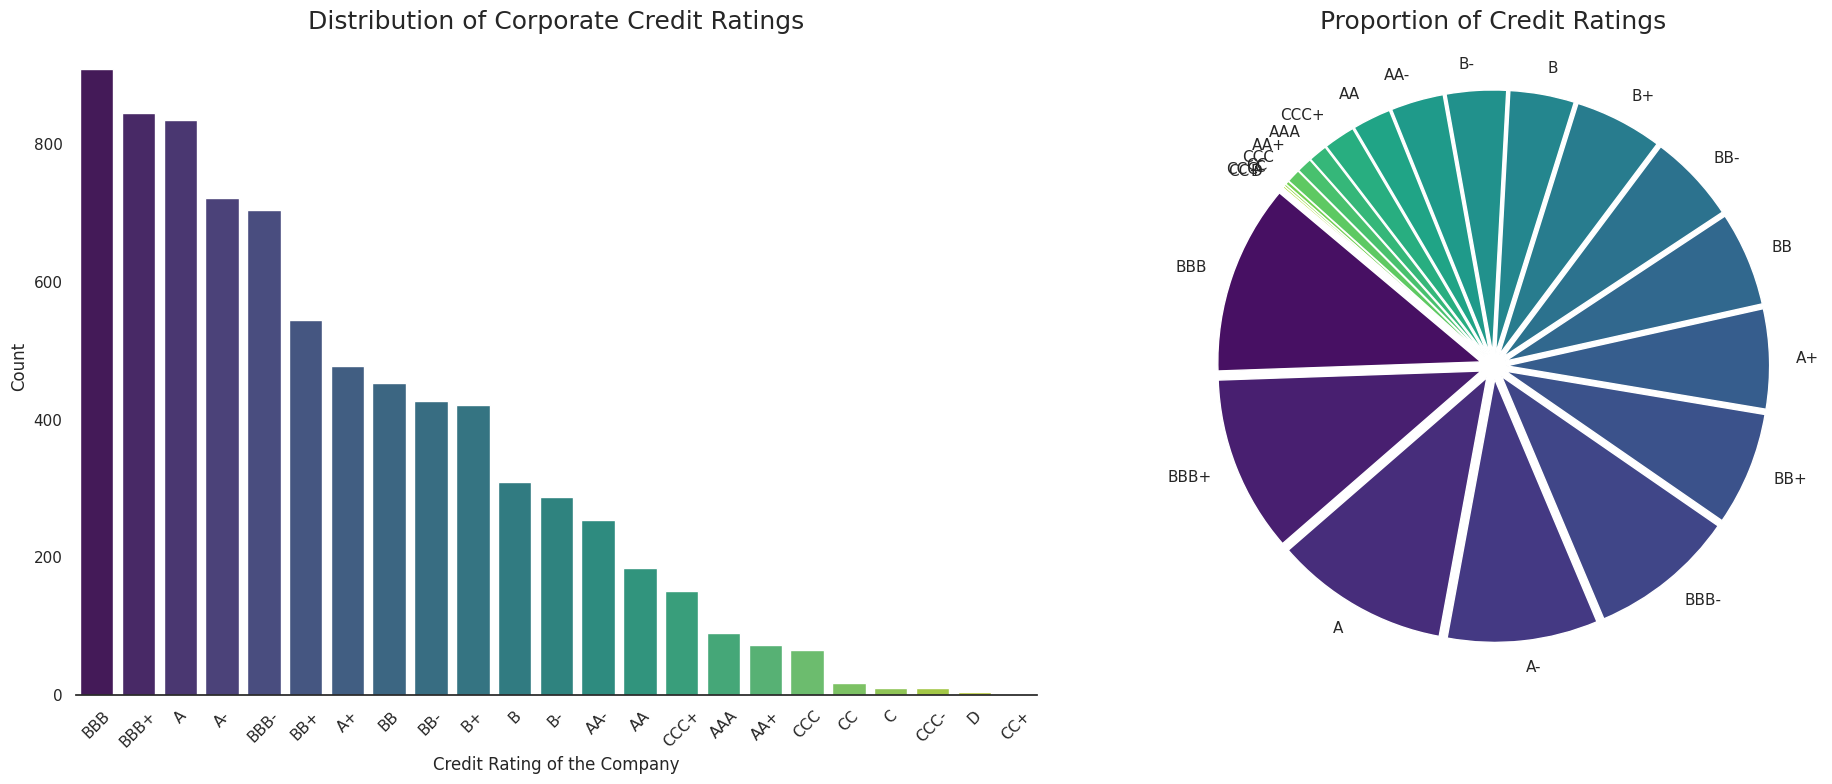

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title("Distribution of Corporate Credit Ratings", fontsize=18)
axes[0].set_xlabel("Credit Rating of the Company")
axes[0].set_ylabel("Count")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

axes[1].pie(df['Rating'].value_counts(), 
            labels=df['Rating'].value_counts().index, 
            startangle=140, 
            colors=sns.color_palette('viridis', n_colors=len(df['Rating'].unique())),
            explode=[.05] * len(df['Rating'].value_counts()))
axes[1].set_title("Proportion of Credit Ratings", fontsize=18)

plt.tight_layout()

### 3. Feature Distribution
numerical -> skewness, kurtosis and outliers
categorical -> cardinality (histograms, box plots)

In [77]:
print(f"Skewness of feature 'Debt/Equity Ratio: {df['Debt/Equity Ratio'].skew()}")
print(f"Kurtosis of the same variabel: {df['Debt/Equity Ratio'].kurt()}")

Skewness of feature 'Debt/Equity Ratio: -27.879849890636876
Kurtosis of the same variabel: 973.7825208732777


Text(0.5, 1.0, "Outliers check in 'Debt/Equity Ratio'")

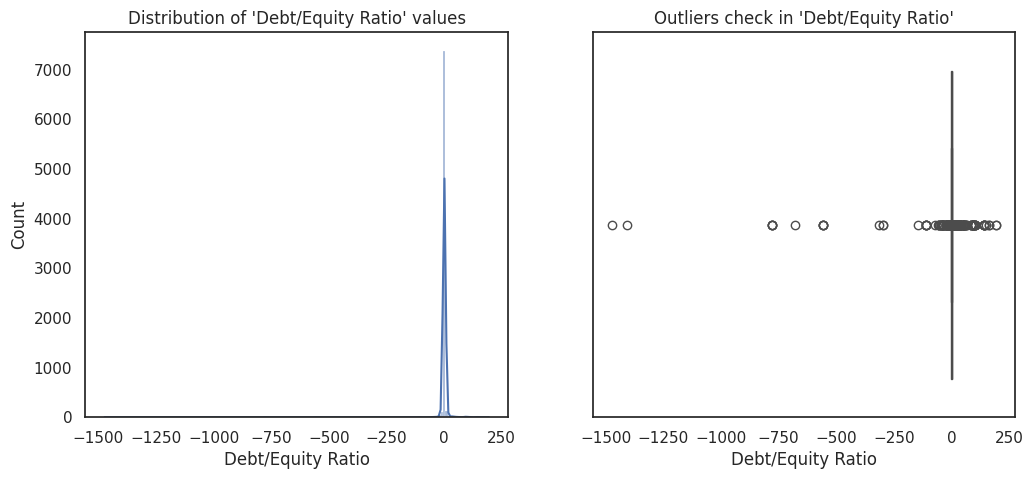

In [83]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['Debt/Equity Ratio'], kde=True, ax=axes[0])
axes[0].set_title(f"Distribution of 'Debt/Equity Ratio' values")

sns.boxplot(x=df['Debt/Equity Ratio'], ax=axes[1])
axes[1].set_title(f"Outliers check in 'Debt/Equity Ratio'")

### 4. Feature Relationships
correlation, (correlation heatmap, scatterplot matrix, violin plots, ...)

### 5. High-Dimensional Visualization
projection of data in 2D/3D (pca, umap)